# Exploratory Data Analysis : Iphone SE reviews

## Introduction

In this Jupyter Notebook, we are going to explore the Iphone SE reviews file in order to have a better overall understanding of the dataset

This exploration include 4 key steps :

1. **Data Exploration:** We begin by importing necessary libraries and loading the dataset to get a first view of the dataset structure.

2. **Ratings Distribution:** We visualize the distribution of ratings.

3. **Text Length Analysis:** By creating a new feature representing the length of reviews, we gain insights into the text's dimensions across different rating classes.

4. **Top Comments:** We explore the top 10 most frequently occurring comments in the dataset.

Through these steps, we should have a comprehensive picture of the whole dataset, which features stand out and what aspects might require further attention.


## Data Exploration

Importing necessary libraries

In [44]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [47]:
# Load the dataset
df = pd.read_csv('data/APPLE_iPhone_SE.csv')


In [48]:
df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


Checking the shape of the DataFrame

In [25]:
df.shape

(9713, 3)

File Info

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


Checking possible null values

In [27]:
df.isnull().sum()

Ratings    0
Comment    0
Reviews    0
dtype: int64

## Ratings Distribution

In [28]:
print(df["Ratings"].value_counts())
fig = px.histogram(df, x="Ratings",color="Ratings",text_auto=True, title="Ratings distribution")
fig.show()

5    6788
4    1717
3     535
1     474
2     199
Name: Ratings, dtype: int64


We can see that we have an unequal distribution of classes: we have a large number of ratings at 5 and very low for the other classes. This could be a problem in the context of a classification. Indeed, a low quantity of data for certain classes can lead to confusion when classifying reviews.

## Text Length Analysis

Checking the reviews length for each classes 

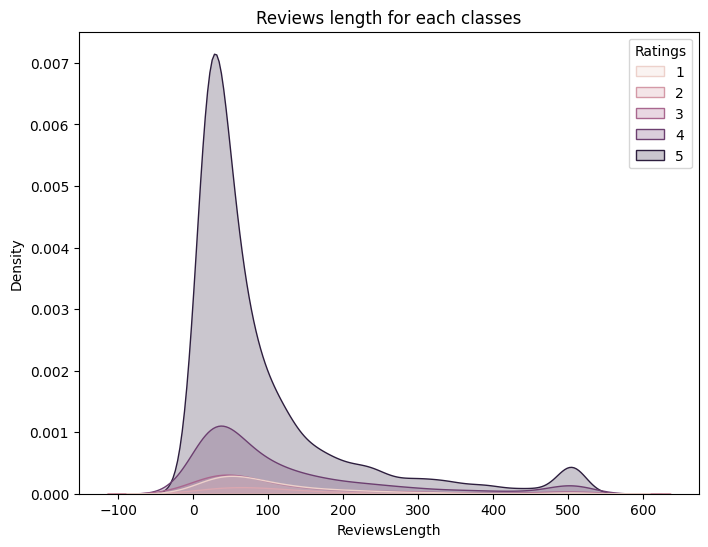

In [51]:
plt.figure(figsize=(8,6))

# Create a new column with the length of the reviews
df["ReviewsLength"] = df["Reviews"].apply(len)

# Plot text length for each class
sns.kdeplot(data=df, x="ReviewsLength",hue="Ratings",fill=True)

plt.title("Reviews length for each classes")
plt.show()

In [56]:
average_review_length_by_rating = df.groupby('Ratings')['ReviewsLength'].mean().reset_index()
average_review_length_by_rating

,Ratings,ReviewsLength
0,1,119.360759
1,2,127.884422
2,3,125.545794
3,4,122.729179
4,5,91.147171


We can see that reviews with a 5 rate are shorter than the other reviews (the other 4 types of reviews have more or less the same average length)

## Top Comments

In [50]:
# Select the top 10 most frequent "Comment" values
top_10_comments = df["Comment"].value_counts().head(10).reset_index()

#histogram
fig = px.histogram(top_10_comments, x="index", y="Comment", color="index", title="Top 10 Comments")
fig.show()